In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
#定义归一化方法(用于对数据集的数据进行归一化)
transform = transforms.Compose(#compose：创建
    [transforms.ToTensor(),#将加载进来的数据变成Tensor格式
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))#R,G,B的平均值和标准差
    ]
)

In [3]:
#训练数据集
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=False,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers=2)
#batch_size=4，每次加载4个图片，shuffle打乱顺序，num_workers线程数量

#测试数据集
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False,num_workers = 2)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

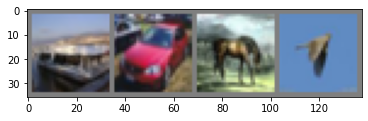

In [5]:
#显示方法
def imshow(img):
    #输入数据：torch.tensor [c,h,w]
    img = img / 2+0.5
    nping = np.transpose(img.numpy(),(1,2,0)) #[h,w,c]
    plt.imshow(nping)

dataiter = iter(trainloader) #随机加载一个mini batch
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [6]:
#运算
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):#定义神经网络结构，输入数据 3x32x32
        super(Net,self).__init__()
        #第一层（卷积层）
        self.conv1 = nn.Conv2d(3,6,3) #输入频道3个，输出频道6个，卷积3x3
        #第二层（卷积层）
        self.conv2 = nn.Conv2d(6,16,3) # 输入频道6个，输出频道16个，卷积3x3
        #第三层（全连接层）
        self.fc1 = nn.Linear(16*28*28,512) #输入维度16x28x28，输出维度512
        #第四层（全连接层）
        self.fc2 = nn.Linear(512,64) #输入维度512，输出维度64
        #第五层（全连接层）
        self.fc3 = nn.Linear(64,10) #输入维度64，输出维度10
        
    def forward(self,x): #定义数据流向
        x = self.conv1(x)
        x = F.relu(x)
        
        x = self.conv2(x)
        x = F.relu(x)
        
        x = x.view(-1,16*28*28)
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        
        x = self.fc3(x)
        
        return(x) 
net = Net()

In [7]:
#定义损失函数和网络权值更新规则
import torch.optim as optim

criterion = nn.CrossEntropyLoss() #定义损失函数
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)




In [15]:
#训练模型
import time
import numpy as np
epoch_loss, per_loss, timer = [],[],[]


for epoch in range(10):
    time_start = time.time()
    for images, labels in trainloader:
        outputs = net(images)
        loss = criterion(outputs,labels) #损失函数
        optimizer.zero_grad() #清零现有梯度
        loss.backward() #当前梯度后向传递
        optimizer.step() #更新权值
        per_loss.append(loss.item())
    
    loss1 = np.mean(per_loss)
    per_loss = []
    epoch_loss.append(loss1)
    time_end = time.time()
    time_cost = time_end - time_start
    timer.append(time_cost)
    print('Epoch: %d, epoch_loss = %.3f, time_cost = %.4f'%(epoch,loss1,time_cost))


Epoch: 0, epoch_loss = 0.344, time_cost = 747.9526
Epoch: 1, epoch_loss = 0.235, time_cost = 772.4657
Epoch: 2, epoch_loss = 0.164, time_cost = 773.9858
Epoch: 3, epoch_loss = 0.127, time_cost = 728.8243
Epoch: 4, epoch_loss = 0.111, time_cost = 725.6693
Epoch: 5, epoch_loss = 0.096, time_cost = 725.9426
Epoch: 6, epoch_loss = 0.074, time_cost = 700.0904
Epoch: 7, epoch_loss = 0.067, time_cost = 682.0623
Epoch: 8, epoch_loss = 0.059, time_cost = 676.7993
Epoch: 9, epoch_loss = 0.060, time_cost = 674.2061


In [16]:
#测试模型
correct = 0.0
total = 0.0

with torch.no_grad(): #不计算梯度（默认会计算）
    for images, labels in testloader:     
        outputs = net(images)
        loss = criterion(outputs,labels) #损失函数
        
        _, predicted = torch.max(outputs.data, 1)
        
        correct += (predicted == labels).sum()
        total += labels.size(0)

print('准确率：',float(correct)/total)


准确率： 0.5755


In [17]:
#保存模型
torch.save(net.state_dict(),'./cat_recognizer_model.pt')
#读取模型
net_2 = Net()
net_2.load_state_dict(torch.load('./cat_recognizer_model.pt'))

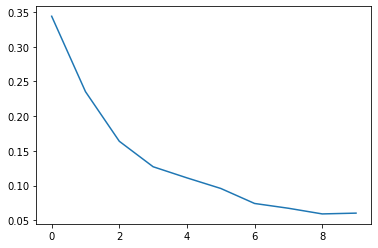

In [19]:
#训练集损失
import matplotlib.pyplot as plt
plt.plot(epoch_loss)
